In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('logs/log_dqn_2_raw_all.csv', names=["episode", "step", "episode_reward", "world", "level", "level_progress", "episode_length"])
df

,episode,step,episode_reward,world,level,level_progress,episode_length
0,0,940,51,1,1,350,941
1,0,3732,69,1,1,371,3733
2,0,3833,261,1,1,656,3834
3,0,3905,632,1,1,931,3906
4,0,4095,179,1,1,499,4096
...,...,...,...,...,...,...,...
2233,135,408183,376,1,1,691,3113
2234,131,408361,506,1,1,819,1400
2235,142,409043,352,1,1,683,1744
2236,136,409431,319,1,1,652,4096


In [4]:
binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()
binned_df

/tmp/ipykernel_2834558/470501487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_df = df.groupby(pd.cut(df['step'], bins=range(0, 5000 * (max(df['step']) // 5000) + 5000, 5000)))['episode_reward'].mean().reset_index()


,step,episode_reward
0,"(0, 5000]",273.312500
1,"(5000, 10000]",386.666667
2,"(10000, 15000]",334.565217
3,"(15000, 20000]",418.375000
4,"(20000, 25000]",310.344828
...,...,...
76,"(380000, 385000]",272.407407
77,"(385000, 390000]",300.925926
78,"(390000, 395000]",332.034483
79,"(395000, 400000]",324.076923


In [5]:
binned_df['step'] = binned_df['step'].map(lambda x: x.mid)

<Axes: xlabel='step', ylabel='episode_reward'>

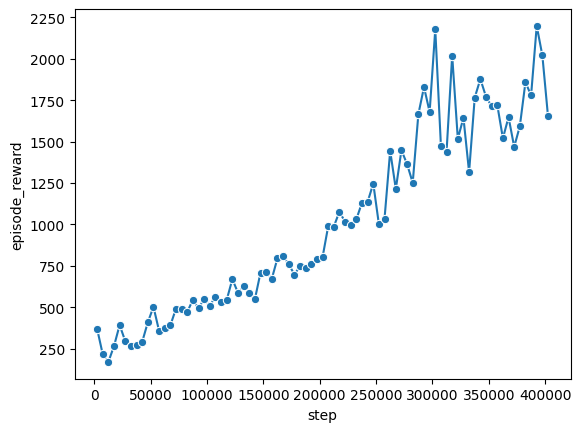

In [44]:
sns.lineplot(x='step', y='episode_reward', data=binned_df, marker='o')

<Axes: xlabel='step', ylabel='episode_reward'>

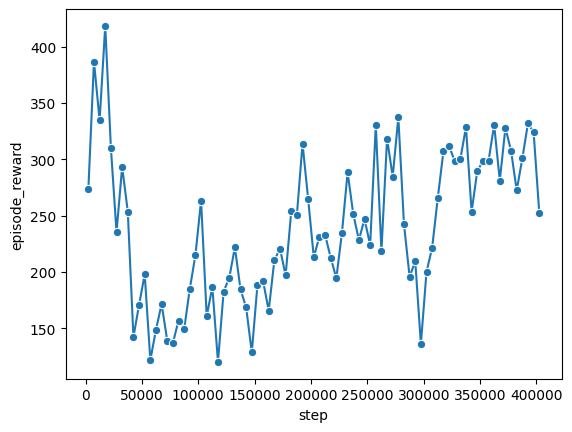

In [6]:
sns.lineplot(x='step', y='episode_reward', data=binned_df, marker='o')